In [1]:
from model import VGGEncoder, VGGDecoder, AdaIN_realign
from torch import nn
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.models import vgg19

In [2]:
T = transforms.Compose([
    transforms.Resize(512),
    transforms.ToTensor()
])

to_pil = transforms.ToPILImage()

enc = VGGEncoder(weight_path="/Users/gursi/Desktop/vgg_normalised.pth")
dec = VGGDecoder(enc, weight_path="/Users/gursi/Desktop/decoder.pth")

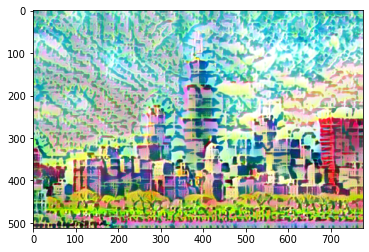

In [3]:
content = Image.open("test-images/content.jpg")
style = Image.open("test-images/style8.jpg").resize(content.size)

content, style = T(content), T(style)
content, style = content.unsqueeze(0), style.unsqueeze(0)

content_enc, style_enc = enc(content)[-1], enc(style)[-1]
content_realigned = AdaIN_realign(style_enc, content_enc)
pred_img = dec(content_realigned)

predicted_img = to_pil(pred_img[0].clip(0,1))
plt.imshow(predicted_img)